In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arviz import hdi
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import pycountry # https://pypi.org/project/pycountry/

import os
from datetime import datetime, timedelta

from rakott.mpl import savefig_bbox, fig_panel_labels

def int_to_dt(t):
    return pd.to_datetime(start_date) + timedelta(days=t)
def dt_to_days(t):
    return (t - datetime(2020, 1, 1)).days
def str_to_dt(t):
    return datetime.strptime(t, '%b %d %Y')

def date_to_int(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    td = dt - datetime(2020, 1, 1)
    return td.days
def date_to_date(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    return dt

date_range = [datetime(2020, 3, 1) + timedelta(weeks=i) for i in range(5)]
date_formatter = mpl.dates.DateFormatter('%b %d')

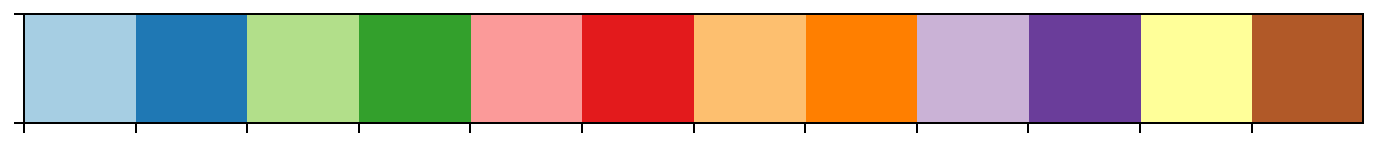

In [2]:
colors = sns.color_palette('Paired')
sns.palplot(colors)

In [58]:
def load_df(job_id, free):
    output_folder = r'../output/{}'.format(job_id)
    table_path = os.path.join(output_folder, 'tables', 'all-countries-{}.csv'.format(job_id))
    df = pd.read_csv(table_path)
    df = df.rename(columns={'official_τ': 'τ official'})
    df['country'] = df['country'].str.replace("_", " ")
    countries = df['country'].unique()
    country_color = {country: colors[i] for i, country in enumerate(countries)}
    df['color'] = [country_color[country] for country in df['country']]
    return df

In [59]:
job_id_free = '7M'
job_id_fixed = '7MFixed'
countries = 'Austria Belgium Denmark France Germany Italy Norway Spain Sweden Switzerland United_Kingdom Wuhan'.split()

In [5]:
dfs = []
for country in countries:
    output_folder = r'../figures/Re/{}/Re_{}.csv'.format(job_id_free, country.replace(' ', '_'))
    df = pd.read_csv(output_folder)
    df['country'] = country
    df['model'] = 'free'
    dfs.append(df)
    output_folder = r'../figures/Re/{}/Re_{}.csv'.format(job_id_fixed, country.replace(' ', '_'))
    df = pd.read_csv(output_folder)
    df['country'] = country
    df['model'] = 'fixed'
    dfs.append(df)
    
df = pd.concat(dfs)
df.head()

,Re_pre,Re_post,rel_reduc_Re,country,model
0,3.983185,0.299913,0.924705,Austria,free
1,1.728835,0.425673,0.753780,Austria,free
2,3.141440,0.337258,0.892642,Austria,free
3,2.539774,0.357643,0.859183,Austria,free
4,3.133668,0.462063,0.852549,Austria,free


In [ ]:
df[]

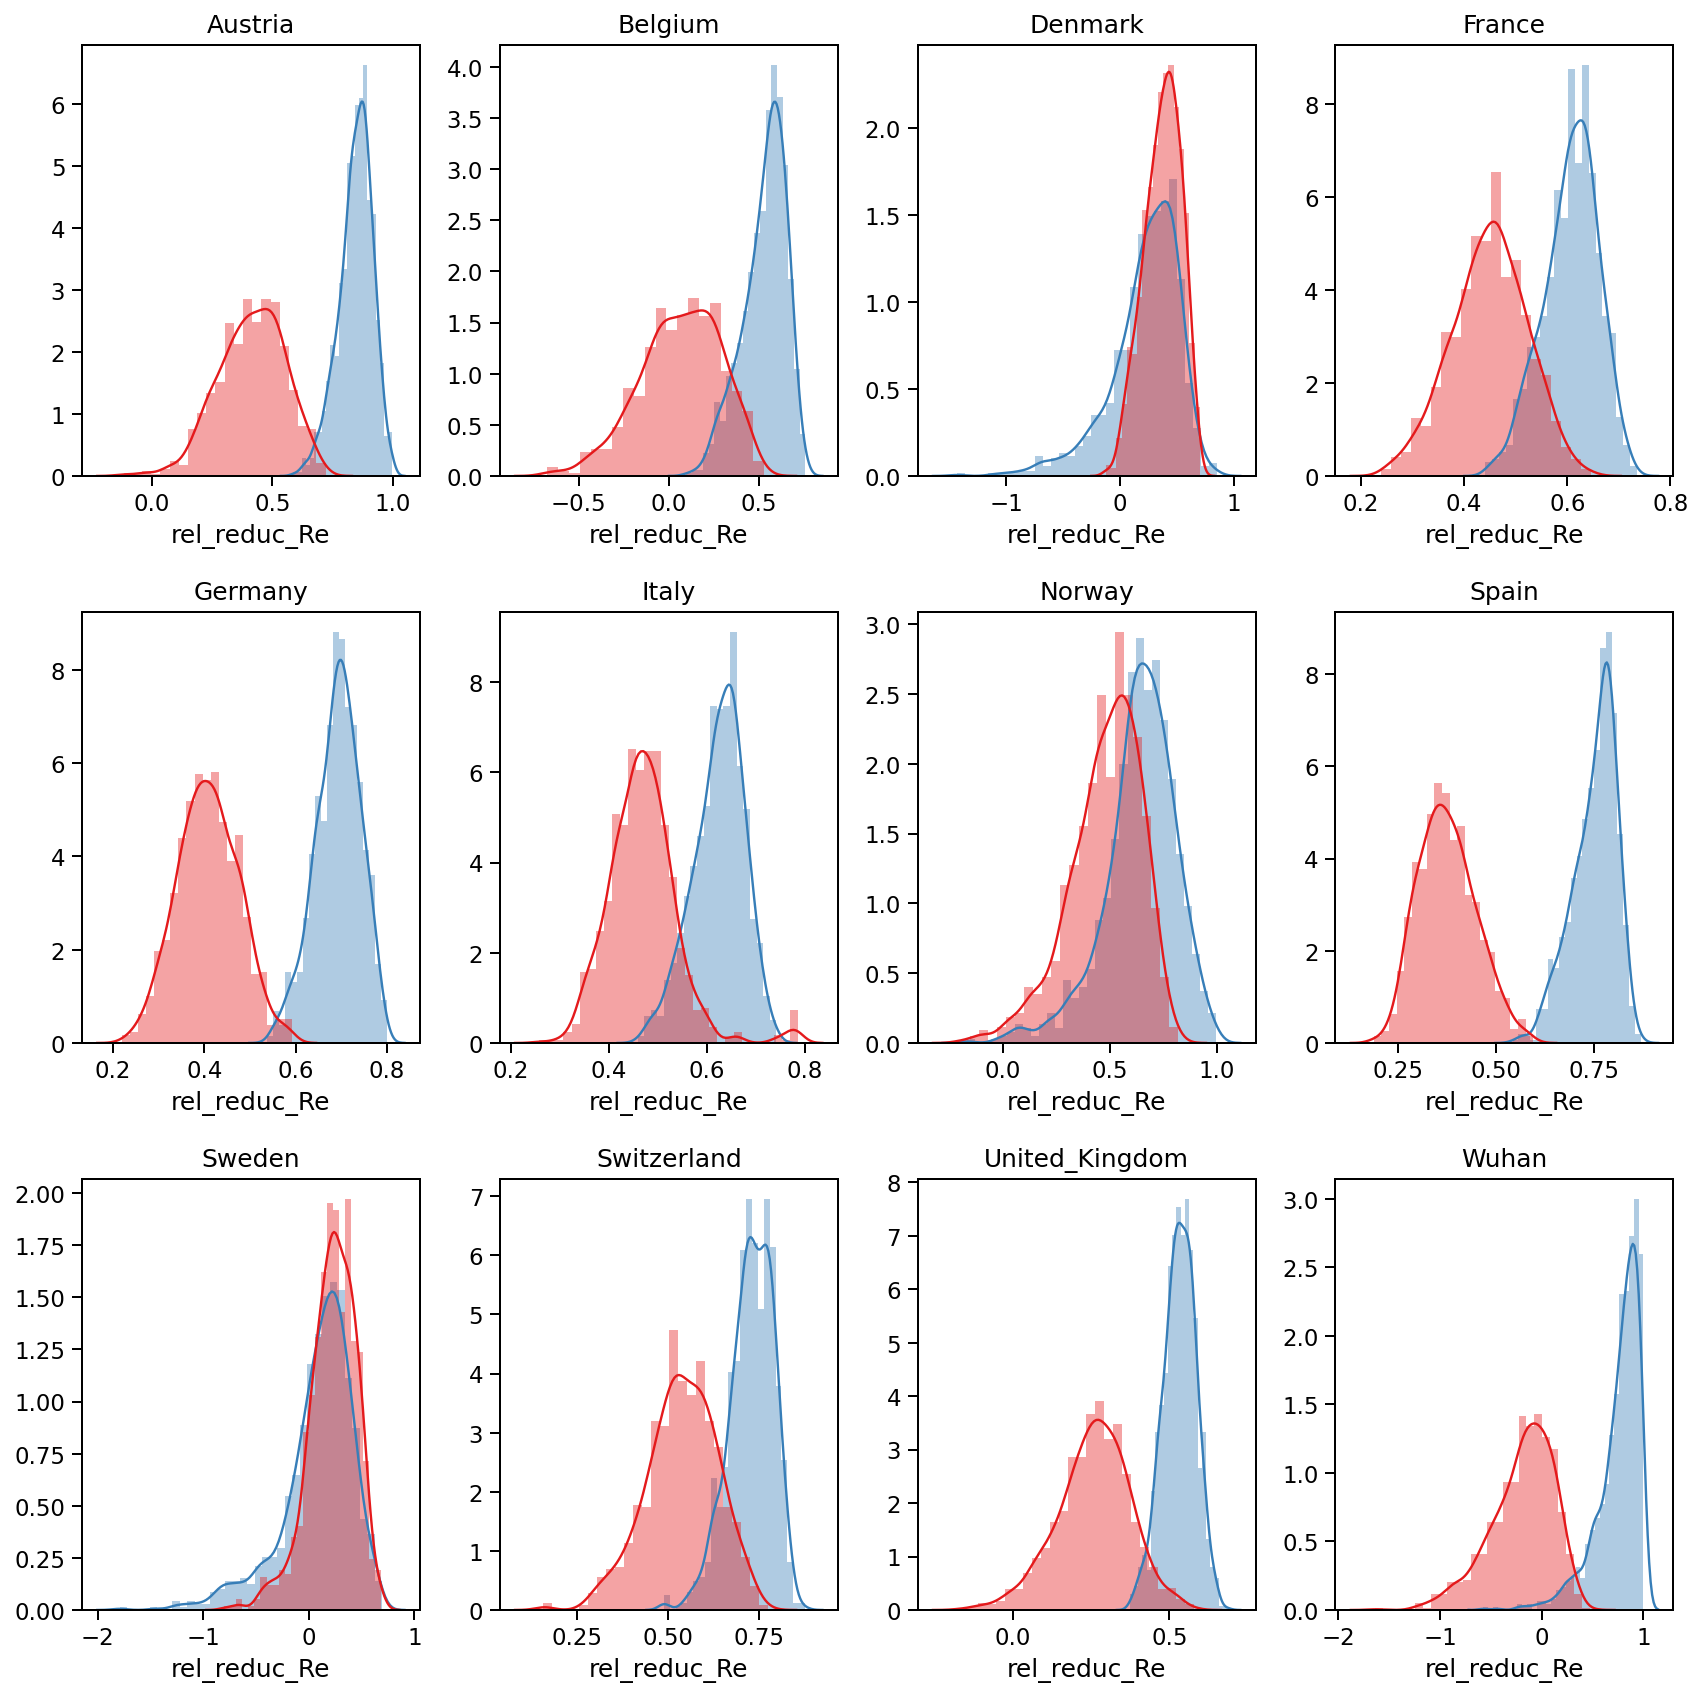

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(12, 12))
for country, ax in zip(countries, axes.flat):
    sns.distplot(df.loc[(df['model']=='free') & (df['country']==country), 'rel_reduc_Re'], ax=ax, color=blue)
    sns.distplot(df.loc[(df['model']=='fixed') & (df['country']==country), 'rel_reduc_Re'], ax=ax, color=red)    
    ax.set_title(country)
    fig.tight_layout()

In [9]:
grp = df.groupby(['country', 'model'])

In [10]:
agg = grp.agg(
    low=pd.NamedAgg(column="rel_reduc_Re", aggfunc=lambda x: hdi(np.array(x), 0.50)[0]),
        median=pd.NamedAgg(column="rel_reduc_Re", aggfunc=np.median),
        high=pd.NamedAgg(column="rel_reduc_Re", aggfunc=lambda x: hdi(np.array(x), 0.50)[1])
).reset_index()

In [13]:
df_free = agg[agg['model'] == 'free']
df_fixed = agg[agg['model'] == 'fixed']
countries = agg['country'].unique()

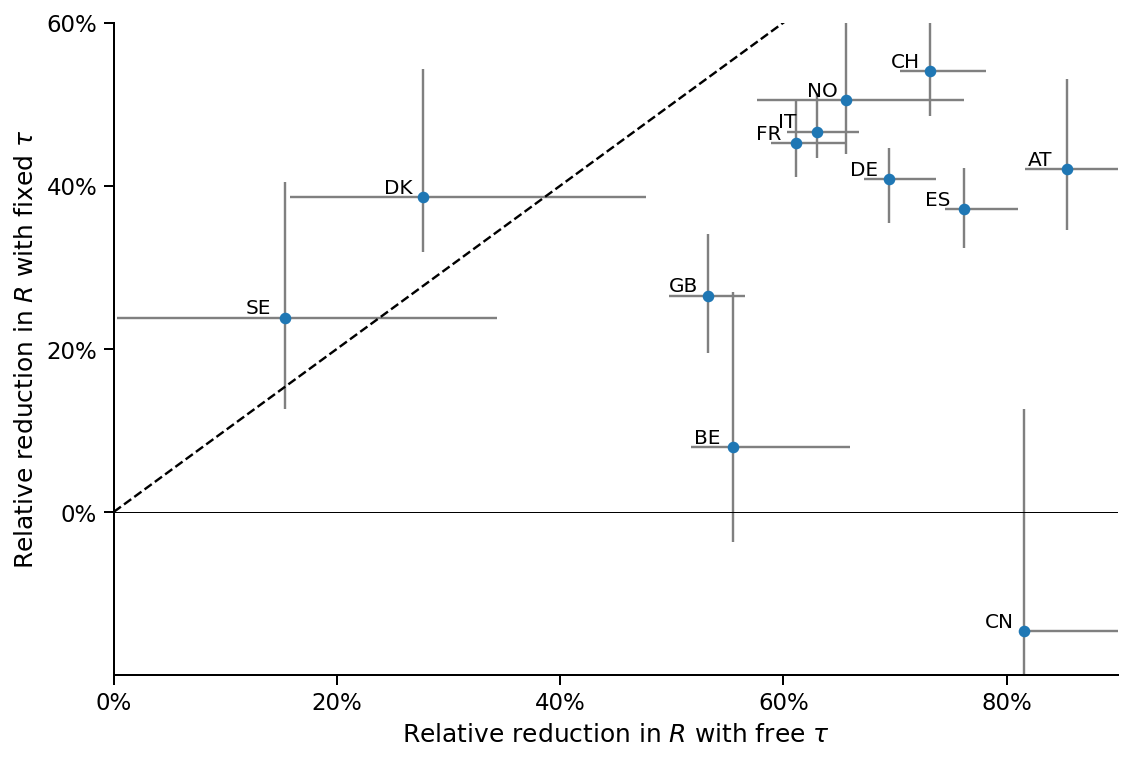

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6), sharex=True, sharey=True)
ax.errorbar(
    df_free['median'], 
    df_fixed['median'], 
    xerr=[df_free['median']-df_free['low'], df_free['high']-df_free['median']],
    yerr=[df_fixed['median']-df_fixed['low'], df_fixed['high']-df_fixed['median']],
    ls='', marker='o',  ecolor='gray'
)
for i, country in enumerate(countries):
    ax.text(
        df_free.loc[df_free['country']==country, 'median']-0.035,
        df_fixed.loc[df_fixed['country']==country, 'median'],
        pycountry.countries.search_fuzzy(
            country.replace('_', ' ').replace('Wuhan', 'China')
        )[0].alpha_2,
        horizontalalignment='left', verticalalignment='bottom', color='k', fontsize=10
    )
ax.plot(np.linspace(0, 1), np.linspace(0, 1), color='k', ls='--')
ax.axhline(0, color='k', lw=0.5)
ax.set(xlim=(0, 0.9), ylim=(-0.2, 0.6), 
       xticks=np.arange(0, 1, 0.2), yticks=np.arange(0, 1, 0.2),
       xlabel=r'Relative reduction in $R$ with free $\tau$', 
       ylabel=r'Relative reduction in $R$ with fixed $\tau$')
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

sns.despine()
fig.savefig('../figures/Fig_Re.pdf', dpi=100)

In [125]:
ΔrelR = df_fixed['median'].values - df_free['median'].values

In [60]:
from Fig_NPI_dates import get_official_dates

In [67]:
job_id = '7M'
table_path = os.path.join('../figures', 'all-countries-{}.csv'.format(job_id))
df = pd.read_csv(table_path).sort_values('country')
df.head()

,country,WAIC,DIC using median,DIC using mean,DIC using MAP,loglik(MAP),loglik(mean),loglik(median),N,p_steps,...,Δt0 MAP,τ mean,τ median,τ MAP,τ hpd 75% from n,τ hpd 75% to n,τ hpd 95% from n,τ hpd 95% to n,τ hpd CrI 75%,τ hpd CrI 95%
5,Austria,35.8173,-1320.1202,-3143.8312,36.1634,-12.0468,-1602.0441,-690.1886,8847037,7000000,...,1.7885,29.4419,29.4891,28.5130,26.6651,32.0021,25.1924,33.0001,5.3370,7.8077
11,Belgium,45.9003,-3703.0873,-2871.4427,49.4432,-15.6314,-1476.0743,-1891.8966,11422068,7000000,...,1.4739,30.4774,30.6092,32.8664,29.0564,33.0000,27.1809,33.0000,3.9436,5.8191
7,Denmark,44.9277,-997.4188,-1651.3163,51.0785,-12.9309,-864.1283,-537.1795,5797446,7000000,...,1.0709,19.0888,18.4115,19.1358,13.1011,20.9974,10.9992,34.1816,7.8963,23.1824
9,France,172.5659,-16118.0823,-3398.8221,174.4260,-79.3027,-1865.9267,-8225.5568,66987244,7000000,...,1.9966,32.4713,32.4388,32.1523,32.0078,32.9945,31.0000,35.0876,0.9867,4.0876
4,Germany,174.9683,-2049.4116,-12662.7027,180.0276,-81.3807,-6502.7459,-1196.1003,82927922,7000000,...,1.5700,27.0447,27.0793,27.0593,26.5249,28.0000,26.0919,27.9998,1.4750,1.9080


In [83]:
Δτ = df['τ median from 1 Jan'].values - df['official τ from 1 Jan'].values

In [79]:
import statsmodels.api as sm

In [86]:
reg = sm.OLS(ΔrelR, sm.add_constant(Δτ)).fit()
reg.summary()

/Users/yoavram/miniconda3/envs/EffectiveNPI/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     12.42
Date:                Mon, 25 Jan 2021   Prob (F-statistic):            0.00550
Time:                        21:09:59   Log-Likelihood:                 3.5126
No. Observations:                  12   AIC:                            -3.025
Df Residuals:                      10   BIC:                            -2.055
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2007      0.061     -3.303      0.008      -0.336      -0.065
x1            -0.0313      0.009     -3.524      0.006      -0.051      -0.012
==============================================================================
Omnibus:                        5.018   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                1.945
Skew:                          -0.886   Prob(JB):                        0.378
Kurtosis:                       3.868   Cond. No.                         7.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(50,)

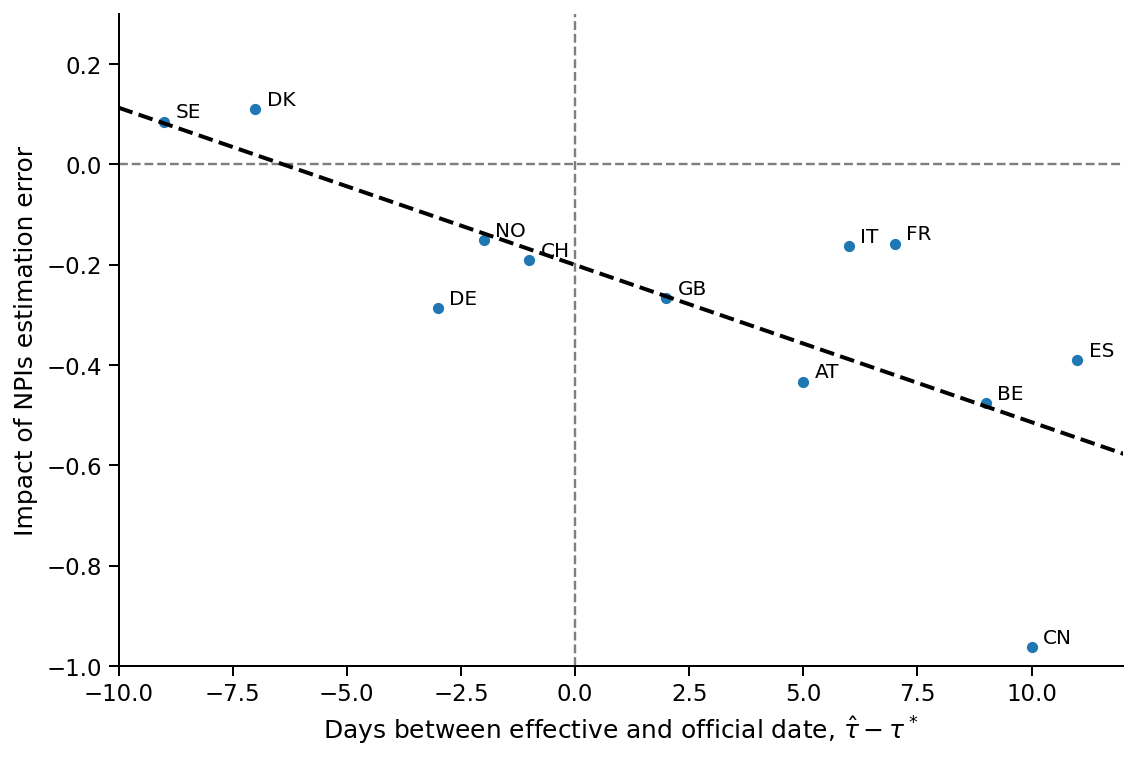

In [134]:
fig, ax = plt.subplots(figsize=(9, 6))
line_kws = dict(ls='--', color='k', alpha=0.5)

xrange = np.linspace(-10, 15)
ax.scatter(
    Δτ,
    ΔrelR
)
ax.plot(xrange, reg.predict(sm.add_constant(xrange)), ls='--', lw=2, color='k')
for x, y, cn in zip(Δτ, ΔrelR, countries):
    ax.text(
        x+0.25, y,
        pycountry.countries.search_fuzzy(cn.replace('_', ' ').replace('Wuhan', 'China'))[0].alpha_2,
        horizontalalignment='left', verticalalignment='bottom', color='k', fontsize=10
    )
ax.axhline(0, **line_kws)
ax.axvline(0, **line_kws)
ax.set(xlim=(-10, 12), ylim=(-1, 0.3))
ax.set_xlabel(r'Days between effective and official date, $\hat{\tau}- \tau^*$')
ax.set_ylabel('Impact of NPIs estimation error')

sns.despine()
fig.savefig('../figures/Fig_Re2.pdf', dpi=100)

/Users/yoavram/miniconda3/envs/EffectiveNPI/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


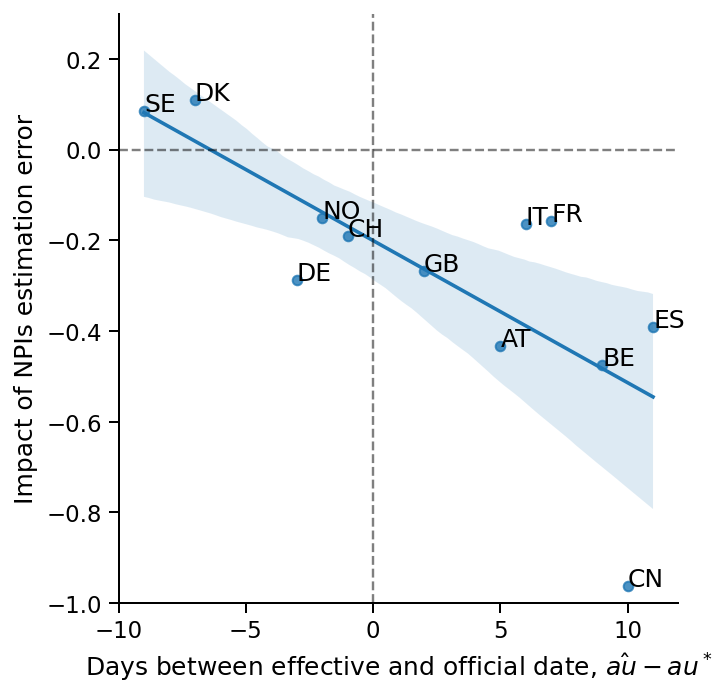

In [99]:
line_kws = dict(ls='--', color='k', alpha=0.5)
linreg_df = pd.DataFrame({'NPI impact error':ΔrelR, 'Delay': Δτ})
g = sns.lmplot('Delay', 'NPI impact error', linreg_df, )
ax = g.axes[0,0]
for x, y, cn in zip(Δτ, ΔrelR, countries):
    ax.text(x, y, pycountry.countries.search_fuzzy(
        cn.replace('_', ' ').replace('Wuhan', 'China')
    )[0].alpha_2)
ax.axhline(0, **line_kws)
ax.axvline(0, **line_kws)
ax.set(xlim=(-10, 12), ylim=(-1, 0.3))
plt.xlabel('Days between effective and official date, $\hat{\tau}- \tau^*$')
plt.ylabel('Impact of NPIs estimation error');